# Personality Prediction System (Model Testing)

This notebook will perform the following tasks:

1. <b>Analyzing</b> the testing data
2. <b>Deserializing</b> the trained model
3. <b>Making predictions</b> using the testing data and the model
4. <b>Evaluating</b> the performance of the model

Based on the performance of the model, its hyperparameters can be fine-tuned to ensure high levels of accuracy, precision and recall.

This notebook continues off from `model_training.ipynb`.

---

## Initialization

In [1]:
# General imports

import numpy as np
import pandas as pd

In [2]:
# Creating a Pandas dataframe using the training data

df_test = pd.read_csv('./data/test.csv')

df_test

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible
...,...,...,...,...,...,...,...,...
310,Female,19,6,5,6,4,3,extraverted
311,Male,18,2,5,8,3,7,dependable
312,Male,18,7,5,6,2,7,serious
313,Male,23,6,7,5,4,3,extraverted


## Exploratory Data Analysis

In [3]:
# Checking whether the dataset has missing values

missing_values = df_test.isnull().sum()

missing_values = missing_values.apply(lambda x: f'{x} missing values' if x > 0 else 'No missing values')

missing_values

Gender                       No missing values
Age                          No missing values
openness                     No missing values
neuroticism                  No missing values
conscientiousness            No missing values
agreeableness                No missing values
extraversion                 No missing values
Personality (class label)    No missing values
dtype: object

In [4]:
# Checking how many unique targets are in the dataframe

targets = df_test.iloc[:, -1]
unique_targets = np.unique(targets)
print(unique_targets)
print(f'There are {len(unique_targets)} unique targets in the dataframe.')

['dependable' 'extraverted' 'lively' 'responsible' 'serious']
There are 5 unique targets in the dataframe.


Both the training data and the testing data have the same number of unique targets, so we have no issues regarding targets.

In [5]:
# Checking the unique genders in the dataframe

genders = df_test.iloc[:, 0]
unique_genders = np.unique(genders)
print(unique_genders)

['Female' 'Male']


No gender outliers (unlike in training data).

In [6]:
# Checking the range of values of 'age'

ages = df_test.iloc[:, 1]
unique_ages = np.unique(ages)
print(f'Age ranges from {unique_ages[0]} to {unique_ages[-1]}')

Age ranges from 5 to 28


Similar to the training data, we also seem to have an outlier of 5 in the `age` of the testing data. But as we will be evaluating the performance of the model, we will not be removing this outlier (to check the model's capabilities when dealing with previously unseen real-world data).

Just out of curiosity, we will plot the distribution of age for visualization purposes:

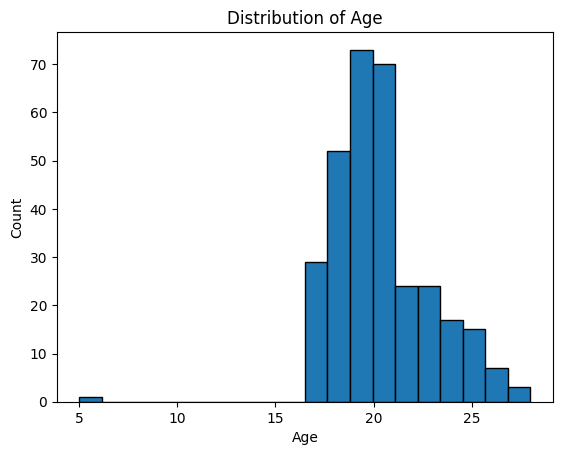

In [7]:
# Plotting the distribution of 'age'

import matplotlib.pyplot as plt

plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

In [8]:
# Checking how many times 5 (an outlier) appears in 'age'

count = 0

for age in ages:
    if age == 5:
        count = count + 1
        
print(f"5 appears {count} times in 'age'")

5 appears 1 times in 'age'


## Preparing the Model

In [27]:
# Unpickling the trained model

import pickle

with open('random_forest_trained.pkl', 'rb') as file:
    model = pickle.load(file)
    
model

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       max_features='log2', min_samples_leaf=3,
                       min_samples_split=5)

## Data Preprocessing (Testing Data)

In [10]:
# Fixing the names of the columns of the dataframe

df_test.rename(columns={'Personality (class label)': 'personality'}, inplace=True)
df_test.rename(columns={'Gender': 'gender'}, inplace=True)
df_test.rename(columns={'Age': 'age'}, inplace=True)

# NOTE:
# inplace=True ensures that the dataframe 'df' is modified in place
# without creating a new dataframe. If this is omitted, a new dataframe
# is returned, which must be reassigned to a new variable.

df_test

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,personality
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible
...,...,...,...,...,...,...,...,...
310,Female,19,6,5,6,4,3,extraverted
311,Male,18,2,5,8,3,7,dependable
312,Male,18,7,5,6,2,7,serious
313,Male,23,6,7,5,4,3,extraverted


In [11]:
# Getting a list of the rows that have an age of 5

outlier_row_numbers = df_test.loc[df_test['age'] == 5].index.tolist()
print(outlier_row_numbers)

[261]


In [12]:
# Removing the outlying age sample

df_test = df_test.drop(index=outlier_row_numbers)
df_test = df_test.reset_index(drop=True)

In [13]:
# Encoding the values of 'gender' using label encoding

from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
df_test['gender'] = gender_encoder.fit_transform(df_test['gender'])

df_test

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,personality
0,0,20,7,9,9,5,5,dependable
1,1,17,5,4,5,2,4,serious
2,0,25,5,5,7,2,4,serious
3,0,18,6,2,7,4,7,serious
4,0,19,2,4,7,1,3,responsible
...,...,...,...,...,...,...,...,...
309,0,19,6,5,6,4,3,extraverted
310,1,18,2,5,8,3,7,dependable
311,1,18,7,5,6,2,7,serious
312,1,23,6,7,5,4,3,extraverted


In [14]:
# Checking whether the gender encoding has occured properly

encoded_unique_genders = np.unique(df_test['gender'])
encoded_unique_genders

array([0, 1])

In [15]:
# Encoding the values of 'personality' (targets) using label encoding

target_encoder = LabelEncoder()
df_test['personality'] = target_encoder.fit_transform(df_test['personality'])

df_test

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,personality
0,0,20,7,9,9,5,5,0
1,1,17,5,4,5,2,4,4
2,0,25,5,5,7,2,4,4
3,0,18,6,2,7,4,7,4
4,0,19,2,4,7,1,3,3
...,...,...,...,...,...,...,...,...
309,0,19,6,5,6,4,3,1
310,1,18,2,5,8,3,7,0
311,1,18,7,5,6,2,7,4
312,1,23,6,7,5,4,3,1


In [16]:
# Separating the features from the dataset

X_test = df_test[['gender', 'age', 'openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']]
X_test

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion
0,0,20,7,9,9,5,5
1,1,17,5,4,5,2,4
2,0,25,5,5,7,2,4
3,0,18,6,2,7,4,7
4,0,19,2,4,7,1,3
...,...,...,...,...,...,...,...
309,0,19,6,5,6,4,3
310,1,18,2,5,8,3,7
311,1,18,7,5,6,2,7
312,1,23,6,7,5,4,3


In [17]:
# Separating the targets from the dataset

y_test = df_test[['personality']]
y_test

,personality
0,0
1,4
2,4
3,4
4,3
...,...
309,1
310,0
311,4
312,1


In [28]:
# Converting y_train from a column vector to a 1-dimensional array

y_test = np.ravel(y_test)
y_test

# NOTE:
# This is important because the model expects a 1-dimensional array
# or similar object to be passed as an argument to its 'y' parameter.
# Passing any other object may cause the model to behave erratically,
# and even throws a DataConversionWarning during training.

array([0, 4, 4, 4, 3, 4, 1, 4, 4, 4, 4, 3, 3, 4, 2, 1, 4, 4, 4, 1, 4, 0,
       4, 1, 1, 4, 1, 0, 4, 3, 4, 2, 1, 2, 4, 4, 4, 4, 1, 4, 3, 3, 4, 1,
       0, 4, 3, 0, 4, 1, 4, 4, 4, 2, 1, 4, 1, 4, 4, 4, 3, 4, 0, 4, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 4, 4, 4, 1, 4, 4, 1, 1, 4, 2, 4, 4,
       4, 4, 0, 3, 3, 4, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 0, 4, 4, 1, 0, 4,
       4, 4, 2, 4, 1, 1, 4, 4, 4, 1, 2, 2, 3, 4, 2, 4, 4, 3, 3, 4, 0, 0,
       4, 4, 0, 3, 3, 1, 4, 4, 4, 4, 4, 4, 0, 1, 4, 4, 4, 4, 4, 2, 1, 1,
       3, 3, 1, 4, 4, 3, 1, 4, 0, 4, 3, 2, 1, 3, 1, 4, 4, 4, 3, 3, 4, 4,
       2, 4, 3, 4, 2, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 1, 2, 2, 4, 1, 4, 1,
       3, 0, 4, 4, 2, 1, 4, 4, 4, 1, 3, 4, 1, 3, 1, 1, 2, 0, 1, 0, 4, 0,
       2, 1, 0, 4, 4, 1, 4, 1, 3, 4, 1, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4,
       1, 4, 1, 1, 4, 4, 3, 1, 4, 3, 4, 1, 4, 2, 3, 1, 2, 4, 3, 2, 0, 4,
       4, 4, 4, 3, 4, 1, 4, 2, 4, 3, 3, 4, 1, 4, 4, 3, 1, 3, 1, 2, 3, 4,
       1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 4, 4,

## Evaluating the Model

In [29]:
# Making predictions using the testing data on the trained and loaded model

y_pred = model.predict(X_test)
y_pred

array([4, 3, 4, 0, 4, 2, 0, 2, 2, 2, 0, 2, 3, 4, 3, 1, 2, 2, 4, 4, 4, 1,
       4, 0, 4, 1, 4, 4, 0, 4, 2, 3, 1, 2, 4, 4, 4, 1, 3, 0, 1, 4, 1, 0,
       1, 1, 1, 1, 4, 1, 3, 2, 1, 3, 0, 2, 1, 4, 0, 0, 4, 2, 0, 0, 0, 4,
       0, 0, 4, 1, 2, 1, 1, 4, 4, 0, 1, 4, 0, 0, 2, 4, 0, 0, 0, 2, 4, 4,
       0, 2, 4, 2, 4, 0, 2, 2, 4, 1, 2, 4, 2, 3, 1, 2, 2, 0, 4, 4, 0, 4,
       4, 1, 4, 2, 2, 1, 3, 4, 0, 1, 2, 2, 3, 0, 2, 4, 1, 0, 3, 2, 2, 2,
       4, 0, 0, 3, 4, 0, 4, 2, 4, 2, 0, 3, 1, 4, 4, 1, 2, 1, 0, 4, 1, 0,
       2, 2, 4, 4, 0, 3, 1, 4, 4, 4, 3, 4, 2, 4, 4, 4, 0, 0, 3, 3, 4, 4,
       4, 0, 4, 2, 3, 0, 0, 4, 2, 0, 2, 1, 0, 0, 2, 1, 3, 2, 4, 0, 2, 0,
       3, 0, 4, 4, 0, 0, 2, 4, 2, 4, 1, 0, 0, 4, 1, 4, 1, 4, 1, 4, 2, 1,
       4, 1, 0, 4, 4, 1, 0, 1, 0, 1, 4, 3, 1, 4, 1, 1, 2, 1, 0, 1, 4, 4,
       2, 1, 0, 1, 2, 0, 4, 4, 1, 4, 0, 4, 4, 0, 3, 0, 2, 2, 4, 0, 4, 4,
       2, 2, 1, 0, 1, 4, 0, 2, 3, 1, 0, 4, 3, 0, 0, 2, 1, 3, 1, 4, 1, 2,
       2, 2, 1, 2, 2, 3, 4, 1, 1, 3, 2, 0, 0, 1, 3,

In [31]:
# Evaluating model's accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy is {round((accuracy * 100), 2)}%')

Model accuracy is 31.53%
